## Importing Libraries

In [15]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter("ignore")


## Importing data set

In [16]:
df = pd.read_csv('IOT_SENSOR.csv')
df.head(5)

,time,env_condition,Electric UV light,PM Sensor,Motion Detect,Air Q sensor,temperature,humidity,CO reading
0,1:26:00 am,warm & dry,Off,0.008,Off,0.020,25.7,51.0,0.005
1,3:50:00 am,cold & wet,Off,0.005,Off,0.013,22.7,76.0,0.003
2,6:14:00 am,warm & dry,Off,0.008,Off,0.020,24.6,50.9,0.005
3,8:38:00 am,var temp & humid,On,0.007,Off,0.019,28.0,76.8,0.004
4,11:02:00 am,warm & dry,Off,0.008,Off,0.020,26.6,50.9,0.005


In [17]:
df.shape

(25000, 9)

## 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)



### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)

In [18]:


print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('************** 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)************')
print('++++++++++### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)++++++++++++')
print('Ratio of each class')
print(df.env_condition.value_counts(normalize=True))
print("2 categories i.e. 'cold & wet' and 'var temp & humid'  have ratio less than 0.33, hence the dataset is imbalanced")


__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
************** 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)************
++++++++++### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)++++++++++++
Ratio of each class
warm & dry          0.46276
cold & wet          0.27640
var temp & humid    0.26084
Name: env_condition, dtype: float64
2 categories i.e. 'cold & wet' and 'var temp & humid'  have ratio less than 0.33, hence the dataset is imbalanced


### b) This is not a temporal or time series prediction. Therefore, remove unnecessary xvariables which are not useful for classification modelling.

In [19]:
### Dropping time data from the dataframe

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### b) This is not a temporal or time series prediction. Therefore, remove unnecessary xvariables which are not useful for classification modelling.')
df = df.drop(['time'],axis=1)
df.head()

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
### b) This is not a temporal or time series prediction. Therefore, remove unnecessary xvariables which are not useful for classification modelling.


,env_condition,Electric UV light,PM Sensor,Motion Detect,Air Q sensor,temperature,humidity,CO reading
0,warm & dry,Off,0.008,Off,0.020,25.7,51.0,0.005
1,cold & wet,Off,0.005,Off,0.013,22.7,76.0,0.003
2,warm & dry,Off,0.008,Off,0.020,24.6,50.9,0.005
3,var temp & humid,On,0.007,Off,0.019,28.0,76.8,0.004
4,warm & dry,Off,0.008,Off,0.020,26.6,50.9,0.005


### c) Provide correlation matrix of each variable.

In [20]:

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### c) Provide correlation matrix of each variable.')
print(df.corr())

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
### c) Provide correlation matrix of each variable.
              PM Sensor  Air Q sensor  temperature  humidity  CO reading
PM Sensor      1.000000      0.009191     0.010048 -0.113421    0.377626
Air Q sensor   0.009191      1.000000     0.006545 -0.063393   -0.003663
temperature    0.010048      0.006545     1.000000  0.037915   -0.003418
humidity      -0.113421     -0.063393     0.037915  1.000000   -0.031814
CO reading     0.377626     -0.003663    -0.003418 -0.031814    1.000000


### d) Categorize numerical and categorical variable

In [21]:

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### d) Categorize numerical and categorical variable')
print('***Categorical Features:*** "1. env_condition", "2. Electric UV light", "3. Motion Detect"')

print('***Numerical Features:*** "1. PM Sensor  ", "2. Air Q sensor ", "3.  temperature ", "4. humidity ", "5.  CO reading"')

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
### d) Categorize numerical and categorical variable
***Categorical Features:*** "1. env_condition", "2. Electric UV light", "3. Motion Detect"
***Numerical Features:*** "1. PM Sensor  ", "2. Air Q sensor ", "3.  temperature ", "4. humidity ", "5.  CO reading"


### e) Based on the numerical/categorical variable identified in d), verify if the dataset has missing value, use proper method to cater the missing value: (8 marks)


In [22]:

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### e) Based on the numerical/categorical variable identified in d), verify if the dataset has missing value, use proper method to cater the missing value: (8 marks)')
print('Missing values in each column:')
print(df.isna().sum())
size =len(df)
null_percentage = df.isna().sum() * 100 / size
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': null_percentage})
print('Percentage of missing values:')                                
print( missing_value_df)
print('Percentage of missing values for every column is less than 5%, so removing rows with missing data:')    
df.dropna(subset=['PM Sensor', 'Air Q sensor','temperature','CO reading'], inplace=True)
print(df.isna().sum())


__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
### e) Based on the numerical/categorical variable identified in d), verify if the dataset has missing value, use proper method to cater the missing value: (8 marks)
Missing values in each column:
env_condition        0
Electric UV light    0
PM Sensor            4
Motion Detect        0
Air Q sensor         1
temperature          2
humidity             0
CO reading           6
dtype: int64
Percentage of missing values:
                         column_name  percent_missing
env_condition          env_condition            0.000
Electric UV l

In [23]:
df.head()

,env_condition,Electric UV light,PM Sensor,Motion Detect,Air Q sensor,temperature,humidity,CO reading
0,warm & dry,Off,0.008,Off,0.020,25.7,51.0,0.005
1,cold & wet,Off,0.005,Off,0.013,22.7,76.0,0.003
2,warm & dry,Off,0.008,Off,0.020,24.6,50.9,0.005
3,var temp & humid,On,0.007,Off,0.019,28.0,76.8,0.004
4,warm & dry,Off,0.008,Off,0.020,26.6,50.9,0.005


### f.  Use Pandas DataFrame to obtain the following: (15 marks)


In [24]:

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print("*** f 1: Find mean, median, std deviation of each numerical variable identified in 1(d)***")
numerical = ['PM Sensor',  'Air Q sensor' ,  'temperature',      'humidity',    'CO reading']
print("++++++++++++++++++++++++++++")
for col in numerical:
    print('mean of ',col,': ',df[col].mean())
    print('median of ',col,': ',df[col].median())
    print('mode of ',col,': ',df[col].mode()[0])
    print('standard deviation of ',col,': ',df[col].std())
    print("++++++++++++++++++++++++++++")

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
*** f 1: Find mean, median, std deviation of each numerical variable identified in 1(d)***
++++++++++++++++++++++++++++
mean of  PM Sensor :  0.007324680510765166
median of  PM Sensor :  0.006796302
mode of  PM Sensor :  0.004814621
standard deviation of  PM Sensor :  0.00832730148119103
++++++++++++++++++++++++++++
mean of  Air Q sensor :  0.020875860412998243
median of  Air Q sensor :  0.018
mode of  Air Q sensor :  0.02
standard deviation of  Air Q sensor :  0.03741569834562819
++++++++++++++++++++++++++++
mean of  temperature :  22.953

### f ii) Use the following equation to identify if the numerical variables (from 1e) have
outliers. Return the quantity of outliers. You can use the following equations:
• Outlier on the upper side = 3rd Quartile + 1.5 * IQR
• Outlier on the lower side = 1st Quartile – 1.5 * IQR
• Where, IQR (interquartile range) = 3rd Quartile – 1st Quartile

In [25]:
numerical

['PM Sensor', 'Air Q sensor', 'temperature', 'humidity', 'CO reading']

In [26]:


print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('###  f ii) Use the following equation to identify if the numerical variables (from 1e) have outliers. Return the quantity of outliers.')


print('__________________________________________________________________________________________________________________________________')
print('-----------------------PM Sensor--------------------------------------')
Q1 = np.percentile(df['PM Sensor'] , 25)
Q3 = np.percentile(df['PM Sensor'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['PM Sensor']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['PM Sensor'][(df['PM Sensor'] > upper_lim) | (df[col] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['PM Sensor'] > upper_lim) | (df['PM Sensor'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','PM Sensor', ': ',len(outliers))
print('Percentage of Outliers in feature ','PM Sensor', ': ',len(outliers)/len(df['PM Sensor'])*100,'%')
print('++++++++++++++++++++++++++++')


print('__________________________________________________________________________________________________________________________________')

print('-----------------------Air Q Sensor--------------------------------------')
Q1 = np.percentile(df['Air Q sensor'] , 25)
Q3 = np.percentile(df['Air Q sensor'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['Air Q sensor']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['Air Q sensor'][(df['Air Q sensor'] > upper_lim) | (df['Air Q sensor'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['Air Q sensor'] > upper_lim) | (df['Air Q sensor'] < lower_lim) ].index , inplace=True)

print('++++++++++++++++++++++++++++')
print('Outliers in feature ','Air Q sensor', ': ',len(outliers))
print('Percentage of Outliers in feature ','Air Q sensor', ': ',len(outliers)/len(df['Air Q sensor'])*100,'%')
print('++++++++++++++++++++++++++++')



print('__________________________________________________________________________________________________________________________________')
print('-----------------------temperature--------------------------------------')
Q1 = np.percentile(df['temperature'] , 25)
Q3 = np.percentile(df['temperature'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['temperature']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['temperature'][(df['temperature'] > upper_lim) | (df['temperature'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['temperature'] > upper_lim) | (df['temperature'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','temperature', ': ',len(outliers))
print('Percentage of Outliers in feature ','temperature', ': ',len(outliers)/len(df['temperature'])*100,'%')
print('++++++++++++++++++++++++++++')


print('__________________________________________________________________________________________________________________________________')

print('-----------------------humidity--------------------------------------')
Q1 = np.percentile(df['humidity'] , 25)
Q3 = np.percentile(df['humidity'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['humidity']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['humidity'][(df['humidity'] > upper_lim) | (df['humidity'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['humidity'] > upper_lim) | (df['humidity'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','humidity', ': ',len(outliers))
print('Percentage of Outliers in feature ','humidity', ': ',len(outliers)/len(df['humidity'])*100,'%')
print('++++++++++++++++++++++++++++')



print('__________________________________________________________________________________________________________________________________')
print('-----------------------CO reading--------------------------------------')
Q1 = np.percentile(df['CO reading'] , 25)
Q3 = np.percentile(df['CO reading'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['CO reading']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['CO reading'][(df['CO reading'] > upper_lim) | (df['CO reading'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['CO reading'] > upper_lim) | (df['CO reading'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','CO reading', ': ',len(outliers))
print('Percentage of Outliers in feature ','CO reading', ': ',len(outliers)/len(df['CO reading'])*100,'%')
print('++++++++++++++++++++++++++++')

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
###  f ii) Use the following equation to identify if the numerical variables (from 1e) have outliers. Return the quantity of outliers.
__________________________________________________________________________________________________________________________________
-----------------------PM Sensor--------------------------------------
++++++++++++++++++++++++++++
Outliers in feature  PM Sensor :  214
Percentage of Outliers in feature  PM Sensor :  0.863808831839832 %
++++++++++++++++++++++++++++
__________________________________________________________________________________________________________________________________
-----------------------Air Q Sensor---------

### h) Perform the rest of required data preprocessing steps for the preparation of the modelling in the next step. Note: the splitting of the data into training and test set shall follow the split ratio 0.8/0.2 and random seed number=42.

In [27]:
print('__________________________________________________________________________________________________________________________________')
print('---------------------Required Preporcessing of data----------------------------------------')
print('### h) split ratio 0.8/0.2 and random seed number=42')

print('Changing Categorical data in to nominal categorical data')
df[['env_condition','Electric UV light','Motion Detect']]=df[['env_condition','Electric UV light','Motion Detect']].apply(lambda x: pd.factorize(x)[0])
df.head()

print('Extracting Descriptive and Target Features')
target_feature = df.env_condition
descriptive_features = df.drop('env_condition',axis=1)




print('Split test and train')
X_train, X_test, y_train, y_test = train_test_split(descriptive_features,target_feature ,
                                   random_state=42, 
                                   test_size=0.2)


__________________________________________________________________________________________________________________________________
---------------------Required Preporcessing of data----------------------------------------
### h) split ratio 0.8/0.2 and random seed number=42
Changing Categorical data in to nominal categorical data
Extracting Descriptive and Target Features
----------Normalizing data--------
Split test and train


In [28]:
## Importing Libraries
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter("ignore")

## Importing data set
df = pd.read_csv('IOT_SENSOR.csv')
df.head(5)
df.shape
## 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)


### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)


print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('************** 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)************')
print('++++++++++### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)++++++++++++')
print('Ratio of each class')
print(df.env_condition.value_counts(normalize=True))
print("2 categories i.e. 'cold & wet' and 'var temp & humid'  have ratio less than 0.33, hence the dataset is imbalanced")

### b) This is not a temporal or time series prediction. Therefore, remove unnecessary xvariables which are not useful for classification modelling.
### Dropping time data from the dataframe

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### b) This is not a temporal or time series prediction. Therefore, remove unnecessary xvariables which are not useful for classification modelling.')
df = df.drop(['time'],axis=1)
print('Removed TIme from the dataframe')
df.head()
### c) Provide correlation matrix of each variable.

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### c) Provide correlation matrix of each variable.')
print(df.corr())
### d) Categorize numerical and categorical variable

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### d) Categorize numerical and categorical variable')
print('***Categorical Features:*** "1. env_condition", "2. Electric UV light", "3. Motion Detect"')

print('***Numerical Features:*** "1. PM Sensor  ", "2. Air Q sensor ", "3.  temperature ", "4. humidity ", "5.  CO reading"')
### e) Based on the numerical/categorical variable identified in d), verify if the dataset has missing value, use proper method to cater the missing value: (8 marks)


print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('### e) Based on the numerical/categorical variable identified in d), verify if the dataset has missing value, use proper method to cater the missing value: (8 marks)')
print('Missing values in each column:')
print(df.isna().sum())
size =len(df)
null_percentage = df.isna().sum() * 100 / size
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': null_percentage})
print('Percentage of missing values:')                                
print( missing_value_df)
print('Percentage of missing values for every column is less than 5%, so removing rows with missing data:')    
df.dropna(subset=['PM Sensor', 'Air Q sensor','temperature','CO reading'], inplace=True)
print(df.isna().sum())

df.head()
### f.  Use Pandas DataFrame to obtain the following: (15 marks)


print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print("*** f 1: Find mean, median, std deviation of each numerical variable identified in 1(d)***")
numerical = ['PM Sensor',  'Air Q sensor' ,  'temperature',      'humidity',    'CO reading']
print("++++++++++++++++++++++++++++")
for col in numerical:
    print('mean of ',col,': ',df[col].mean())
    print('median of ',col,': ',df[col].median())
    print('mode of ',col,': ',df[col].mode()[0])
    print('standard deviation of ',col,': ',df[col].std())
    print("++++++++++++++++++++++++++++")
### f ii) Use the following equation to identify if the numerical variables (from 1e) have

print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print('###  f ii) Use the following equation to identify if the numerical variables (from 1e) have outliers. Return the quantity of outliers.')


print('__________________________________________________________________________________________________________________________________')
print('-----------------------PM Sensor--------------------------------------')
Q1 = np.percentile(df['PM Sensor'] , 25)
Q3 = np.percentile(df['PM Sensor'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['PM Sensor']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['PM Sensor'][(df['PM Sensor'] > upper_lim) | (df[col] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['PM Sensor'] > upper_lim) | (df['PM Sensor'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','PM Sensor', ': ',len(outliers))
print('Percentage of Outliers in feature ','PM Sensor', ': ',len(outliers)/len(df['PM Sensor'])*100,'%')
print('++++++++++++++++++++++++++++')


print('__________________________________________________________________________________________________________________________________')

print('-----------------------Air Q Sensor--------------------------------------')
Q1 = np.percentile(df['Air Q sensor'] , 25)
Q3 = np.percentile(df['Air Q sensor'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['Air Q sensor']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['Air Q sensor'][(df['Air Q sensor'] > upper_lim) | (df['Air Q sensor'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['Air Q sensor'] > upper_lim) | (df['Air Q sensor'] < lower_lim) ].index , inplace=True)

print('++++++++++++++++++++++++++++')
print('Outliers in feature ','Air Q sensor', ': ',len(outliers))
print('Percentage of Outliers in feature ','Air Q sensor', ': ',len(outliers)/len(df['Air Q sensor'])*100,'%')
print('++++++++++++++++++++++++++++')



print('__________________________________________________________________________________________________________________________________')
print('-----------------------temperature--------------------------------------')
Q1 = np.percentile(df['temperature'] , 25)
Q3 = np.percentile(df['temperature'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['temperature']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['temperature'][(df['temperature'] > upper_lim) | (df['temperature'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['temperature'] > upper_lim) | (df['temperature'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','temperature', ': ',len(outliers))
print('Percentage of Outliers in feature ','temperature', ': ',len(outliers)/len(df['temperature'])*100,'%')
print('++++++++++++++++++++++++++++')


print('__________________________________________________________________________________________________________________________________')

print('-----------------------humidity--------------------------------------')
Q1 = np.percentile(df['humidity'] , 25)
Q3 = np.percentile(df['humidity'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['humidity']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['humidity'][(df['humidity'] > upper_lim) | (df['humidity'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['humidity'] > upper_lim) | (df['humidity'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','humidity', ': ',len(outliers))
print('Percentage of Outliers in feature ','humidity', ': ',len(outliers)/len(df['humidity'])*100,'%')
print('++++++++++++++++++++++++++++')



print('__________________________________________________________________________________________________________________________________')
print('-----------------------CO reading--------------------------------------')
Q1 = np.percentile(df['CO reading'] , 25)
Q3 = np.percentile(df['CO reading'] , 75)

    # 2.
Q1,Q3 = np.percentile(df['CO reading']  , [25,75])

    # Find IQR, upper limit, lower limit
IQR = Q3 - Q1
upper_lim = Q3+1.5*IQR
lower_lim = Q1-1.5*IQR
    
    # Find outliers
outliers = df['CO reading'][(df['CO reading'] > upper_lim) | (df['CO reading'] < lower_lim)]
### Dropping outliers from the feature
df.drop(df[(df['CO reading'] > upper_lim) | (df['CO reading'] < lower_lim) ].index , inplace=True)
print('++++++++++++++++++++++++++++')
print('Outliers in feature ','CO reading', ': ',len(outliers))
print('Percentage of Outliers in feature ','CO reading', ': ',len(outliers)/len(df['CO reading'])*100,'%')
print('++++++++++++++++++++++++++++')
### h) Perform the rest of required data preprocessing steps for the preparation of the modelling in the next step. Note: the splitting of the data into training and test set shall follow the split ratio 0.8/0.2 and random seed number=42.
print('__________________________________________________________________________________________________________________________________')
print('---------------------Required Preporcessing of data----------------------------------------')
print('### h) split ratio 0.8/0.2 and random seed number=42')

print('Changing Categorical data in to nominal categorical data')
df[['env_condition','Electric UV light','Motion Detect']]=df[['env_condition','Electric UV light','Motion Detect']].apply(lambda x: pd.factorize(x)[0])
df.head()

print('Extracting Descriptive and Target Features')
target_feature = df.env_condition
descriptive_features = df.drop('env_condition',axis=1)


print('----------Normalizing data--------')
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.head()

print('Split test and train')
X_train, X_test, y_train, y_test = train_test_split(descriptive_features,target_feature ,
                                   random_state=42, 
                                   test_size=0.2)


__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
************** 1. Feature Engineering (Data cleaning and preprocessing) (Total marks:50)************
++++++++++### a) Verify if the dataset is imbalanced. [Hint: set 0.33 as the ratio of the balanced dataset]. (5 marks)++++++++++++
Ratio of each class
warm & dry          0.46276
cold & wet          0.27640
var temp & humid    0.26084
Name: env_condition, dtype: float64
2 categories i.e. 'cold & wet' and 'var temp & humid'  have ratio less than 0.33, hence the dataset is imbalanced
_________________________________________________________________________________________________________________________

### 2. Modelling (Classification) (Total marks: 30)

In [52]:


print('__________________________________________________________________________________________________________________________________')

print('_______________________________________________________2. Modelling (Classification) (Total marks: 30)___________________________________________________________________________')

print('__________________________________________________________________________________________________________________________________')
print('-------------------------------------------------------------')
print("*** 2a: Use two methods: Logistic Regression and KNN.")

print("*************************Logistic Regression********************* ")

clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)


print("************************* KNN ********************* ")

clf2 = KNeighborsClassifier().fit(X_train, y_train)



print("2a i) i) Create a user defined function to get the scores from two methods")
print('Defining function to calculate score of classifiers')
def calculate_score(cl,desc,tar):
    
    scr = cl.score(desc,tar)
    return scr
print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print("2a ii) Use pandas DataFrame to list out the scores of each method.")

results = pd.DataFrame()
results['Classifier'] = ['LogisticRegression','KNN']
scr_lr = calculate_score(clf1,X_train,y_train)
scr_knn = calculate_score(clf2,X_train,y_train)
results['Score'] = [scr_lr,scr_knn]
print('Dataframe with scores')
print(results)

print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print("*** 2a iii)  Based on the score, identify the best method.")
print("According to Scores, KNN Performed better.")


print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('2 b) Based on the optimized method identified in 2a), make prediction on y_test dataset.')

y_pred2 = clf2.predict(X_test)





__________________________________________________________________________________________________________________________________
_______________________________________________________2. Modelling (Classification) (Total marks: 30)___________________________________________________________________________
__________________________________________________________________________________________________________________________________
-------------------------------------------------------------
*** 2a: Use two methods: Logistic Regression and KNN.
*************************Logistic Regression********************* 
************************* KNN ********************* 
2a i) i) Create a user defined function to get the scores from two methods
Defining function to calculate score of classifiers
__________________________________________________________________________________________________________________________________
__________________________________________________________________

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
*** 2c) Create confusion matrix with seaborn heatmap.***


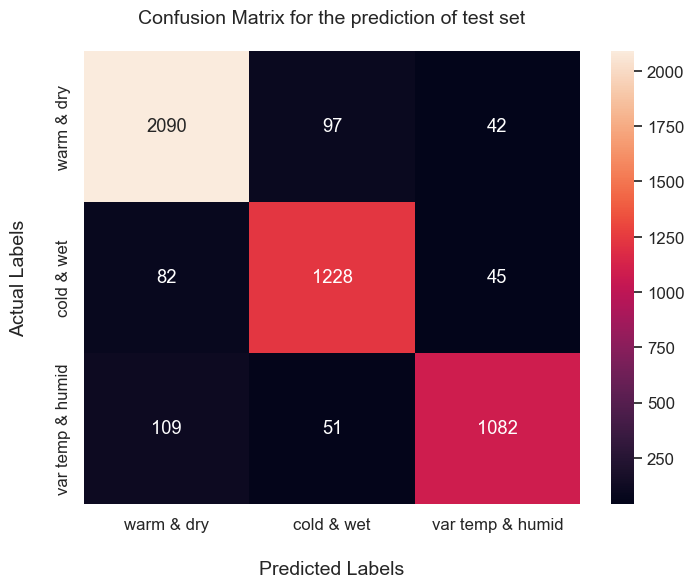

None
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
*** 2d) Evaluate the model performance.***
Accuracy score of K Nearest Neighbours on y_test test set is:  91.17281392457521 %


In [59]:
print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('*** 2c) Create confusion matrix with seaborn heatmap.***')

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
confsn_matrix = confusion_matrix(y_test, y_pred2)

confsn_matrix

plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(confsn_matrix, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Labels", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['warm & dry', 'cold & wet', 'var temp & humid'])

# set y-axis label and ticks
ax.set_ylabel("Actual Labels", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['warm & dry', 'cold & wet', 'var temp & humid'])

# set plot title
ax.set_title("Confusion Matrix for the prediction of test set", fontsize=14, pad=20)
print(plt.show())


print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('*** 2d) Evaluate the model performance.***')

def accuracy_metric(actual, predicted):
 match = 0
 for i in range(len(actual)):
    if actual[i] == predicted[i]:
        match += 1
 return match / float(len(actual)) * 100.0

acc2 = accuracy_metric(y_test.values,y_pred2)
print('Accuracy score of K Nearest Neighbours on y_test test set is: ',acc2,'%')



In [82]:
print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('_______________________________3. Make prediction based on user input (Total marks:20) ___________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('*** 3a) Make prediction/classification of the environmental condition based on the following input data:***')
input = [[0,0.0055,0,0.013,24,80,0.004]]

pred_input =clf2.predict(input)
pred_input
if(pred_input[0]== 0):
    print("Predicted class of input data : warm & dry")
elif(pred_input[0]== 1):
    print("Predicted class of input data : cold & wet")
elif(pred_input[0]== 2):
    print("Predicted class of input data : ***** var temp & humid *****")

print('__________________________________________________________________________________________________________________________________')
print('__________________________________________________________________________________________________________________________________')
print('*** 3b) From 3a), get and print the max probability of class based on the user’s input.***')

number_of_class3 =(target_feature == 2).sum()
probs_of_class = number_of_class3/len(target_feature)
print('Max Probability is : ',probs_of_class)

__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
_______________________________3. Make prediction based on user input (Total marks:20) ___________________________________________
__________________________________________________________________________________________________________________________________
*** 3a) Make prediction/classification of the environmental condition based on the following input data:***
Predicted class of input data : ***** var temp & humid *****
__________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________
*** 3b) From 3a), get and print the max proba

0.2604335032533466